# Reading Argo data by date

Let's use, as an example, data in the *Atlantic for the 11th November 2020. 
It is pre-downloaded in the ./Data folder, but you can download it from the Coriolis GDAC [See here for instructions on how to download the data](https://euroargodev.github.io/argoonlineschool/Lessons/L03_UsingArgoData/Chapter30_UsingArgoData_intro.html#data-used-in-the-argo-online-school)

First, import the libraries

In [1]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

and define a colorbar that will be useful later.

In [2]:
# Usefull colormaps and colorbar makers:
qcmap = mpl.colors.ListedColormap(['#000000' , '#31FC03' , '#ADFC03' , '#FCBA03' ,'#FC1C03',
                                   '#324CA8' , '#000000' , '#000000' , '#B22CC9', '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

Just load the data - this is, all the profiles- in the Atlantic ocean for one particular day, november 11th 2020

In [3]:
dayADS = xr.open_dataset('../../Data/202107-ArgoData/geo/atlantic_ocean/2020/11/20201111_prof.nc')

As we have seen xarray is very handy and read the data and the metadata of the netCDF file:

In [4]:
dayADS

<xarray.Dataset> Size: 21MB
Dimensions:                       (N_PROF: 186, N_PARAM: 3, N_LEVELS: 1331,
                                   N_CALIB: 3, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 0B ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2021-07-10T08:30:50Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

Let use the information in the xarry to obtain the number of profiles in this day:

In [5]:
print(f" for this day there were {dayADS.sizes['N_PROF']} profiles")

 for this day there were 186 profiles


For each one of the profiles, which are the Argo Core missions ones, this is the _Primary sampling_, so we have all the meta-information to track the float that did the observations. Let's see it for a few profiles:

In [6]:
for i1 in range(1,dayADS.sizes['N_PROF'],10):
    print(f"WMO {dayADS.data_vars['PLATFORM_NUMBER'].values.astype(str)[i1]}"
          f" Data Center {dayADS.data_vars['DATA_CENTRE'].values.astype(str)[i1]}"   
          f" Project name {dayADS.data_vars['PROJECT_NAME'].values.astype(str)[i1]}" )

WMO 4903277  Data Center AO Project name US ARGO PROJECT                                                 
WMO 7900506  Data Center IF Project name ARGO-BSH                                                        
WMO 6901986  Data Center IF Project name Argo Netherlands                                                
WMO 4902117  Data Center AO Project name US ARGO PROJECT                                                 
WMO 4902354  Data Center AO Project name US ARGO PROJECT                                                 
WMO 3901551  Data Center BO Project name Argo UK                                                         
WMO 6903788  Data Center IF Project name Argo Italy                                                      
WMO 3901859  Data Center IF Project name MOCCA-EU                                                        
WMO 5906005  Data Center AO Project name UW, SOCCOM, Argo equivalent                                     
WMO 3902207  Data Center AO Project name US AR

The correspondence for the DATA_CENTRE code and the name is in the _Reference table 4: data centres and institutions codes of the [Argo user’s manual](https://archimer.ifremer.fr/doc/00187/29825/)_

We also have have all the geographical information in `LONGITUDE` and `LATITUDE`. 
But first, let's read the data for the same day in the *Pacific* and *Indian* oceans:

In [7]:
dayPDS = xr.open_dataset('../../Data/202107-ArgoData/geo/pacific_ocean/2020/11/20201111_prof.nc')
dayIDS = xr.open_dataset('../../Data/202107-ArgoData/geo/indian_ocean/2020/11/20201111_prof.nc')

and now let's plot all the global observations on that day:

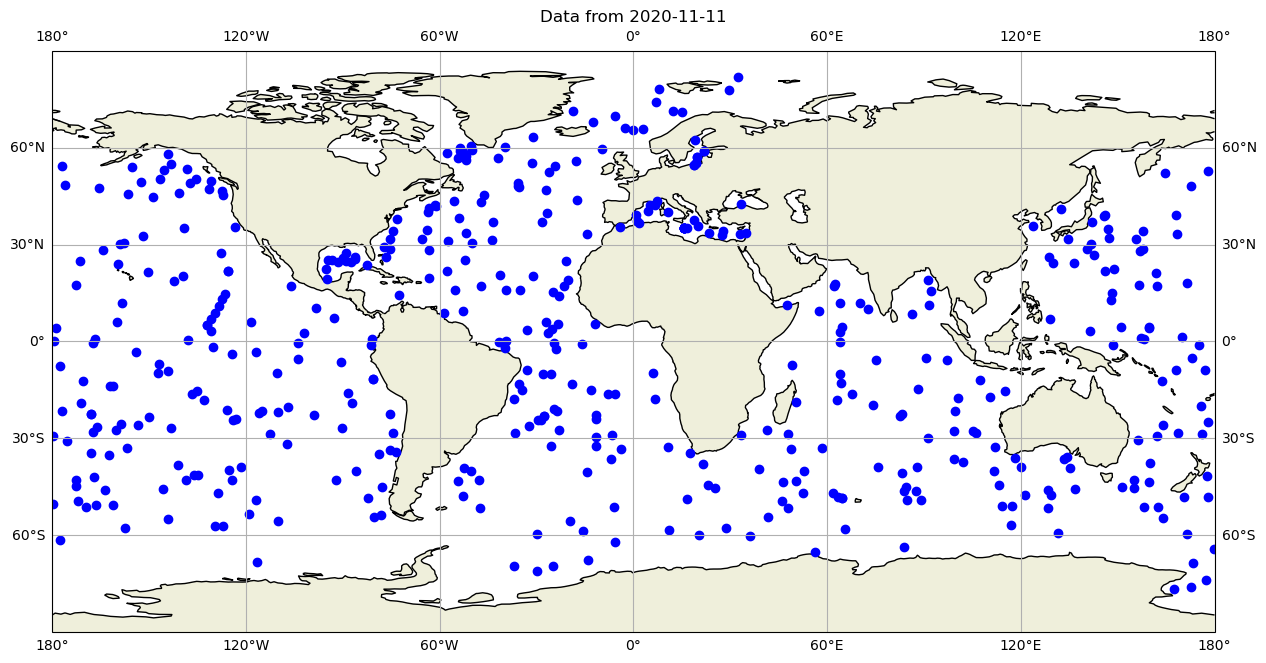

In [8]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.plot(dayADS.LONGITUDE,dayADS.LATITUDE,'ob')
ax.plot(dayPDS.LONGITUDE,dayPDS.LATITUDE,'ob')
ax.plot(dayIDS.LONGITUDE,dayIDS.LATITUDE,'ob')

ax.set_title(f"Data from {dayADS.JULD[0].values.astype('datetime64[D]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

ax.grid()

These files are includes the core argo variables temperature (`TEMP`), salinity(`PSAL`) and pressure (`PRE`), and therefore we can take a quick look at the data, for instance, at the most superficial level for each profile, in the whole ocean:

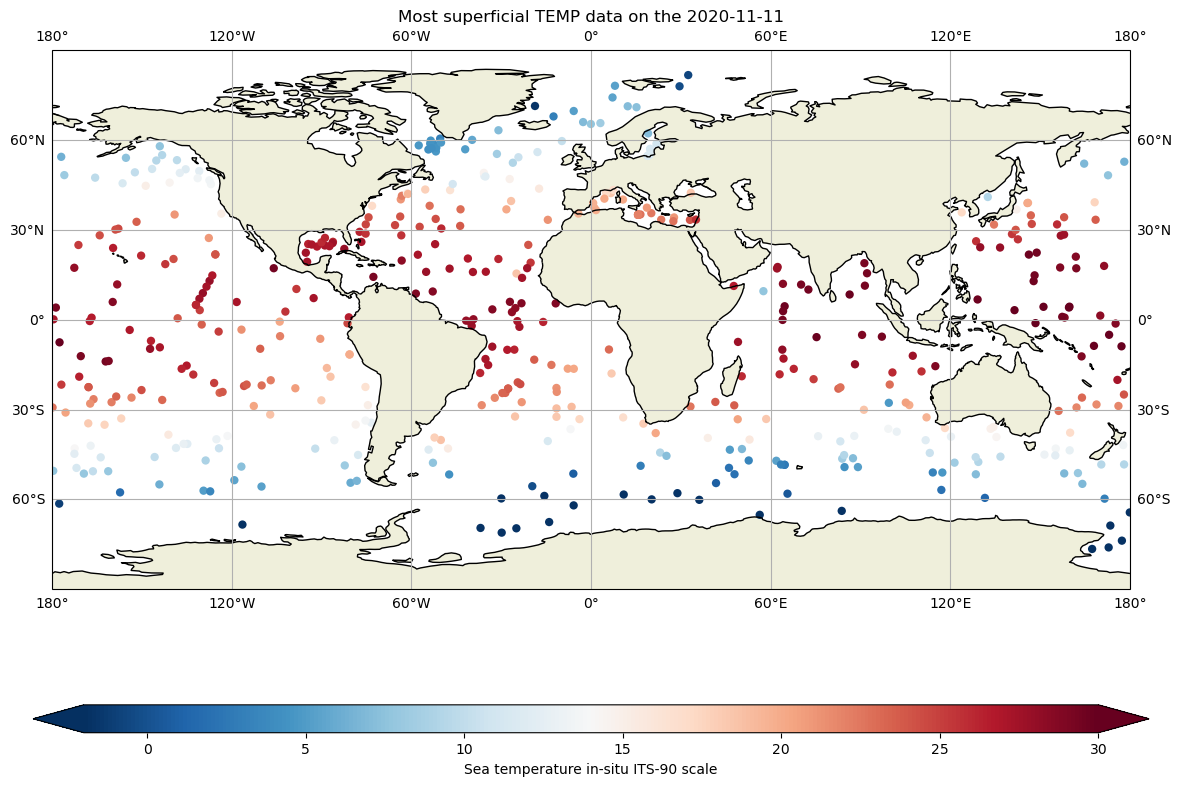

In [9]:
fig,ax = plt.subplots(figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# data for each basin
cs=ax.scatter(dayADS.LONGITUDE,dayADS.LATITUDE,c=dayADS.TEMP[:,1],cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')
ax.scatter(dayPDS.LONGITUDE,dayPDS.LATITUDE,c=dayPDS.TEMP[:,1],cmap="RdBu_r", vmin=-2, vmax=30, edgecolor='none')
ax.scatter(dayIDS.LONGITUDE,dayIDS.LATITUDE,c=dayIDS.TEMP[:,1],cmap="RdBu_r", vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Most superficial TEMP data on the {dayADS.JULD[0].values.astype('datetime64[D]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

#colorbar
cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)

Or with a little of interpolation, we can get the Temperature a 10 dbar (roughly 10 m depth):

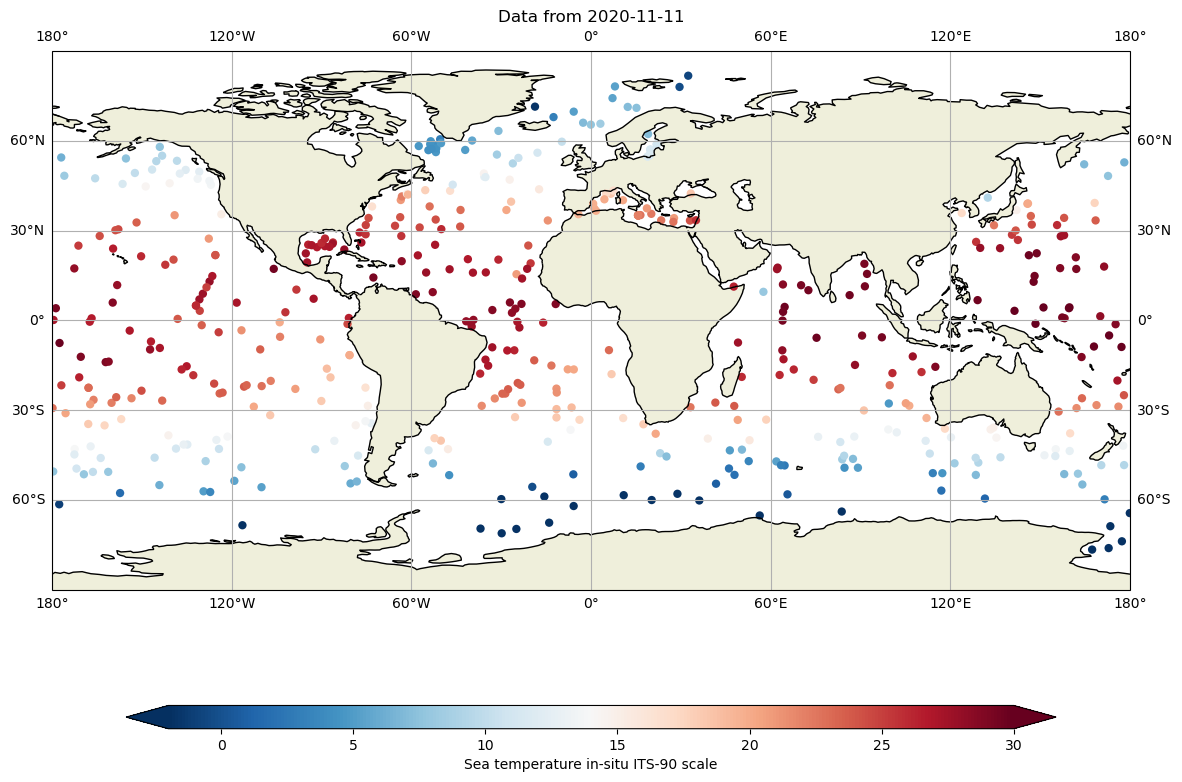

In [10]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

for filein in ['../../Data/202107-ArgoData/geo/atlantic_ocean/2020/11/20201111_prof.nc', 
               '../../Data/202107-ArgoData/geo/pacific_ocean/2020/11/20201111_prof.nc', 
               '../../Data/202107-ArgoData/geo/indian_ocean/2020/11/20201111_prof.nc']:
    #get each profile for the 3 oceans
    DS=xr.open_dataset(filein)
    lon=DS.LONGITUDE.values
    lat=DS.LATITUDE.values
    tempi= np.zeros(lon.shape[0])
    tempi.fill(np.nan)
    #interpolate at 10 dbar
    for ip in range(0,DS.LONGITUDE.shape[0]):
        tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
    cs=ax.scatter(lon,lat,c=tempi,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Data from {DS.JULD[0].values.astype('datetime64[D]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)

And we can evaluate the 10 dbar temperature during the whole month of november 2020:

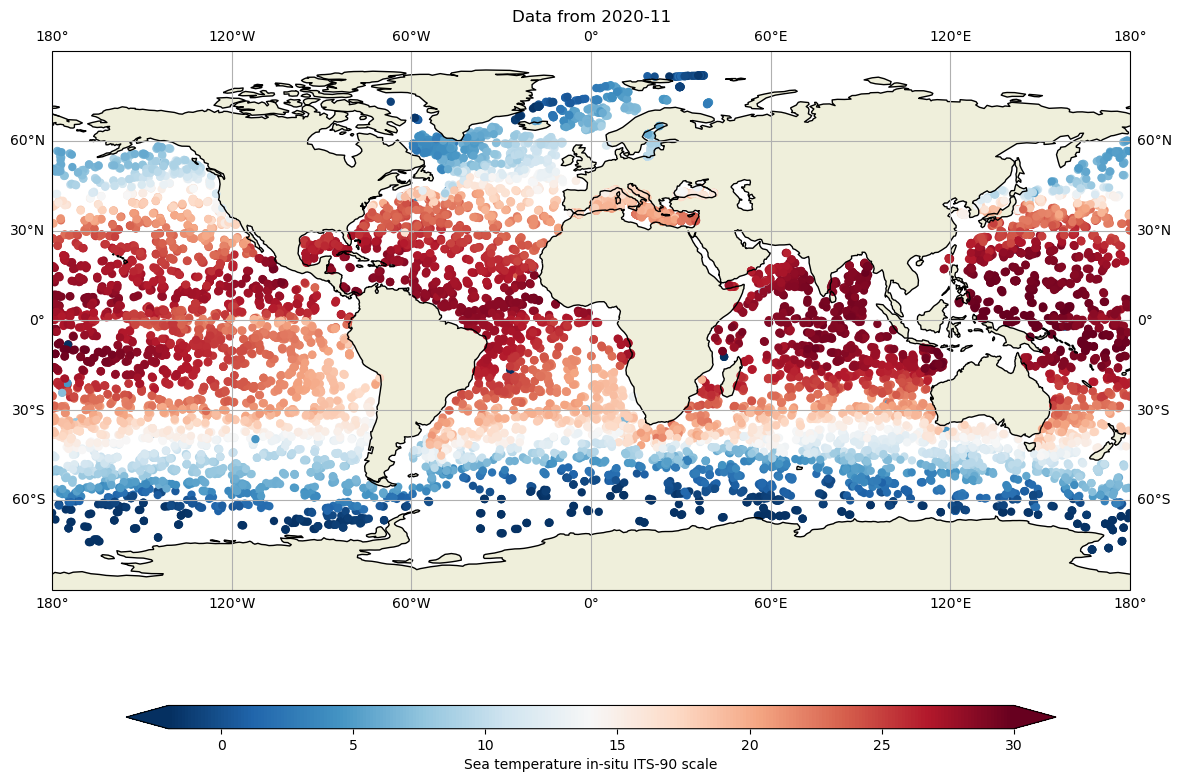

In [11]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

#For the 3 oceans
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/202107-ArgoData/geo/{basin}/2020/11/202011{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        lon=DS.LONGITUDE.values
        lat=DS.LATITUDE.values
        tempi= np.zeros(lon.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,lon.shape[0]):
            tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
        cs=ax.scatter(lon,lat,c=tempi,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Data from {DS.JULD[0].values.astype('datetime64[M]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)    

Let's compare with 10 years ago: 

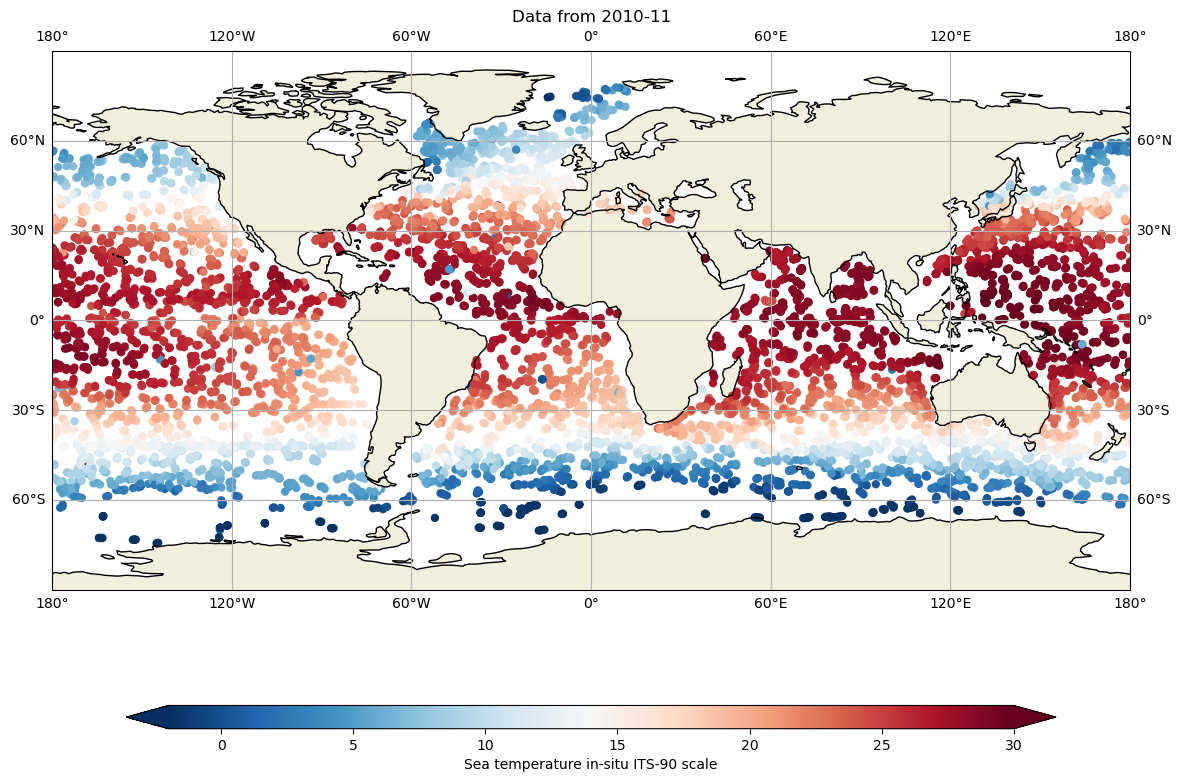

In [12]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

#For the 3 oceans
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/202107-ArgoData/geo/{basin}/2010/11/201011{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        lon=DS.LONGITUDE.values
        lat=DS.LATITUDE.values
        tempi= np.zeros(lon.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,lon.shape[0]):
            tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
        cs=ax.scatter(lon,lat,c=tempi,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.set_title(f"Data from {DS.JULD[0].values.astype('datetime64[M]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(dayPDS.TEMP.long_name)    

and it is possible to get the WMO of all the platforms that measured during this month, together with its data acquisition center. Hence, we can download the netCDF files for each cycle if necessary:

In [13]:
WMOs=np.array([])
DACs=np.array([])
#read all the basins
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/202107-ArgoData/geo/{basin}/2020/11/202011{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        #look for the WMO and DAC for each float
        DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
        WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)

#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]

In [14]:
print(f"During november 2020 {WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],500):
    print(f"{ip} WMO {WMOs[ip]} DAC {DACs[ip]}")

During november 2020 3862 Argo floats where active:
0 WMO 1901302.0 DAC BO
500 WMO 2902785.0 DAC HZ
1000 WMO 3901906.0 DAC BO
1500 WMO 4902932.0 DAC AO
2000 WMO 5904353.0 DAC AO
2500 WMO 5905235.0 DAC AO
3000 WMO 5906115.0 DAC AO
3500 WMO 6902938.0 DAC IF


we can also plot all the vertical profiles of salinity ('PSAL') for the november 11th 2020:

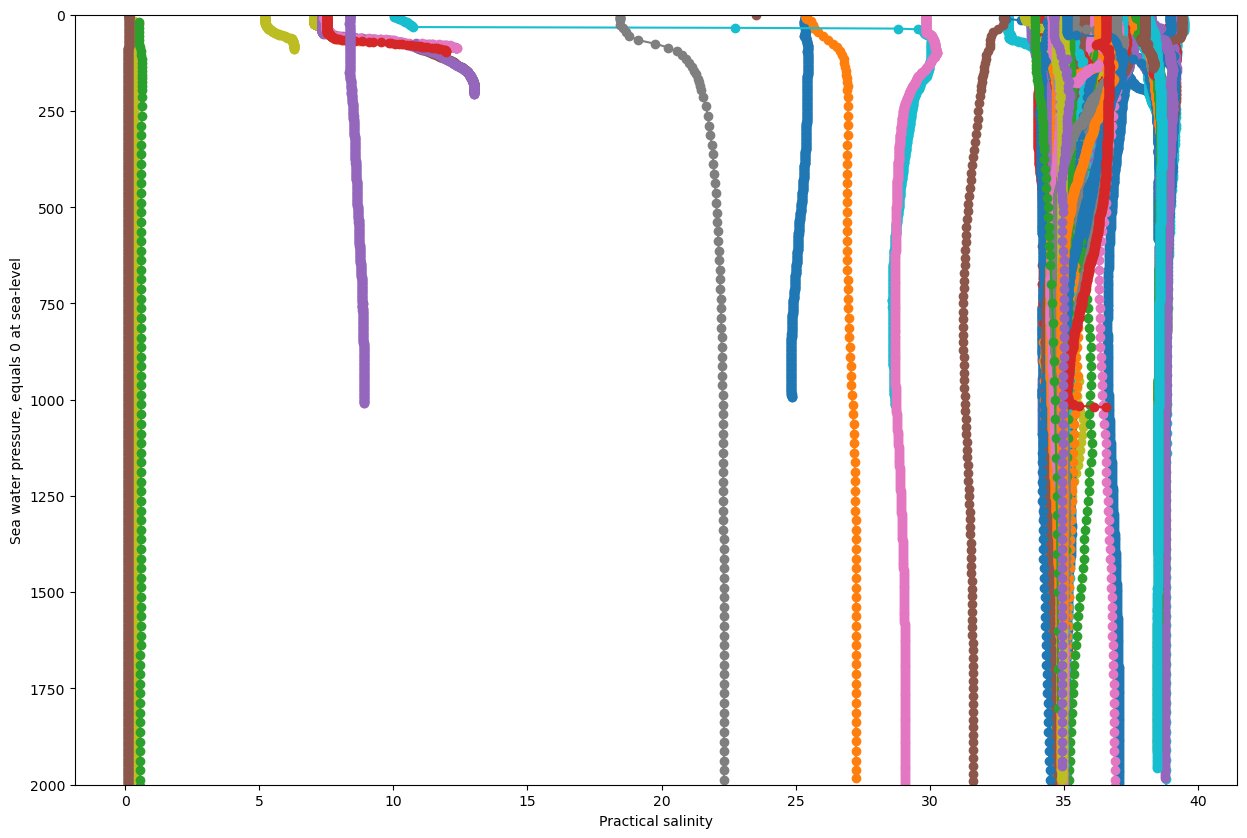

In [15]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(dayADS.PSAL.transpose(),dayADS.PRES.transpose(),'o-')
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel(f"{dayADS.PRES.long_name}");

it is obvious, that there are some *incorrect*, or at least *suspicious* data. 

In the netCDF file, there are a lot of the *_QC* variables. In the case of PSAL_QC, it changes for some profiles

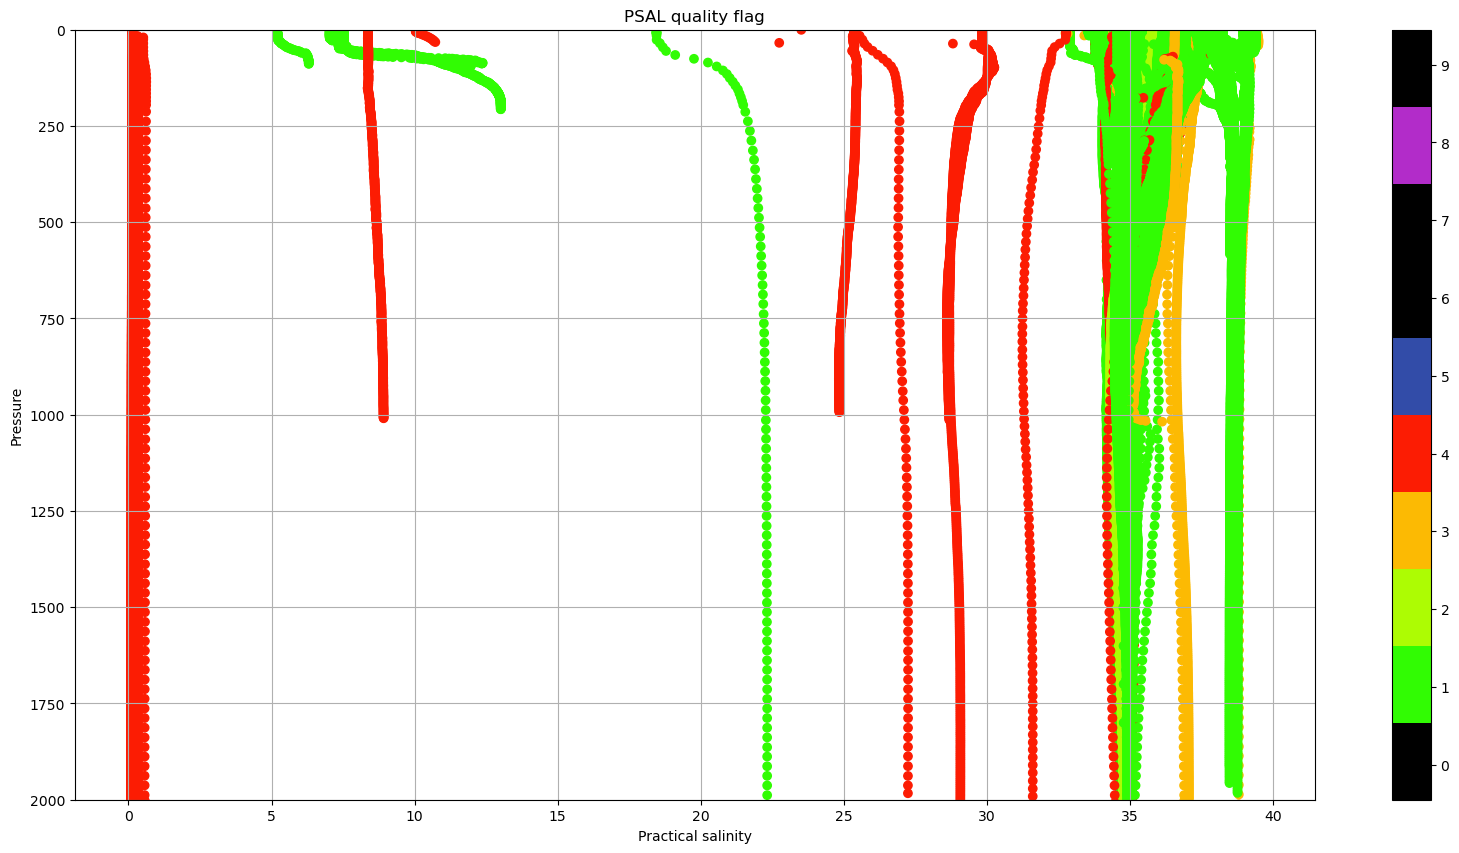

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL, dayADS.PRES, c=dayADS.PSAL_QC, vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax)
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel('Pressure')
ax.set_title(f"PSAL {dayADS.PSAL_QC.long_name}");

In sections [Real Time quality control data](https://euroargodev.github.io/argoonlineschool/Lessons/L03_UsingArgoData/Chapter34b_RTData.html) and [Delayed mode data](https://euroargodev.github.io/argoonlineschool/Lessons/L03_UsingArgoData/Chapter34c_DMData.html) you may learn everything about the use of this quality control flags, so you can choose the best data available!